In [1]:
rm(list=ls())
library(ggplot2)
library(car)
options(width=160, repr.plot.width=11, repr.plot.height=7) 

Warning message:
"package 'car' was built under R version 4.2.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.3"


# Cvičení 7: Analýza rozptylu

V tomto cvičení se budeme zabývat porovnáváním středních hodnot v datech napříč různými kategoriemi.

Stáhněte si soubor https://courses.fit.cvut.cz/BI-PRS/tutorials/files/Data/IchsN.RData do pracovního adresáře.

Načtěte data ze studie _IchsN_, týkající se pacientů s vysokým krevním tlakem.

In [2]:
load("IchsN.RData")

Data můžeme připojit, abychom měli v paměti jednotlivé sloupce rovnou a nemuseli se odvolávat na příslušný data.frame.

Při tomto postupu je potřeba dát pozor, aby se proměnné nepomíchaly.

In [3]:
attach(IchsN)
## mělo by být po skončení práce následováno příkazem detach

 Prozkoumejme základní charakteristiky datového souboru.

In [4]:
head(IchsN)
summary(IchsN)

,vyska,hmot,syst,diast,Rchol,vek,Vzdel,bmi,Kurak
,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<fct>
1,176,89,130,80,0,45,1,28.73192,FALSE
3,172,84,140,90,0,45,1,28.39373,TRUE
4,176,98,120,80,0,45,3,31.63740,FALSE
5,172,79,150,85,1,45,1,26.70362,TRUE
6,178,86,140,80,0,45,2,27.14304,TRUE
7,186,95,120,70,0,45,1,27.45982,TRUE


     vyska            hmot            syst           diast        Rchol        vek        Vzdel       bmi          Kurak    
 Min.   :160.0   Min.   : 60.0   Min.   :100.0   Min.   : 50.00   0:135   Min.   :45.00   1:65   Min.   :20.34   FALSE: 58  
 1st Qu.:172.0   1st Qu.: 74.5   1st Qu.:120.0   1st Qu.: 80.00   1: 32   1st Qu.:46.00   2:61   1st Qu.:24.19   TRUE :109  
 Median :176.0   Median : 82.0   Median :130.0   Median : 82.00           Median :47.00   3:41   Median :26.09              
 Mean   :176.2   Mean   : 81.8   Mean   :131.7   Mean   : 84.44           Mean   :47.05          Mean   :26.31              
 3rd Qu.:180.0   3rd Qu.: 87.0   3rd Qu.:140.0   3rd Qu.: 90.00           3rd Qu.:48.00          3rd Qu.:28.08              
 Max.   :193.0   Max.   :120.0   Max.   :200.0   Max.   :120.00           Max.   :49.00          Max.   :36.23              

Datový soubor má několik sloupců, nás bude zajímat zejména:

- `bmi` - body mass index
- `Vzdel` - dosažené vzdělání s úrovněmi 1,2,3
- `Kurak` - logická proměnná True/False

Chceme zjistit, zda závisí body mass index na vzdělání a na tom, zda je pacient kuřákem.

## Analýza rozptylu jednoduchého třídění

**Závislost bmi na vzdělání**

Uvažujme nejprve faktor vzdělání. Vykresleme histogram a boxplot pro bmi dohromady i zvlášť v závislosti na jednotlivých úrovních.

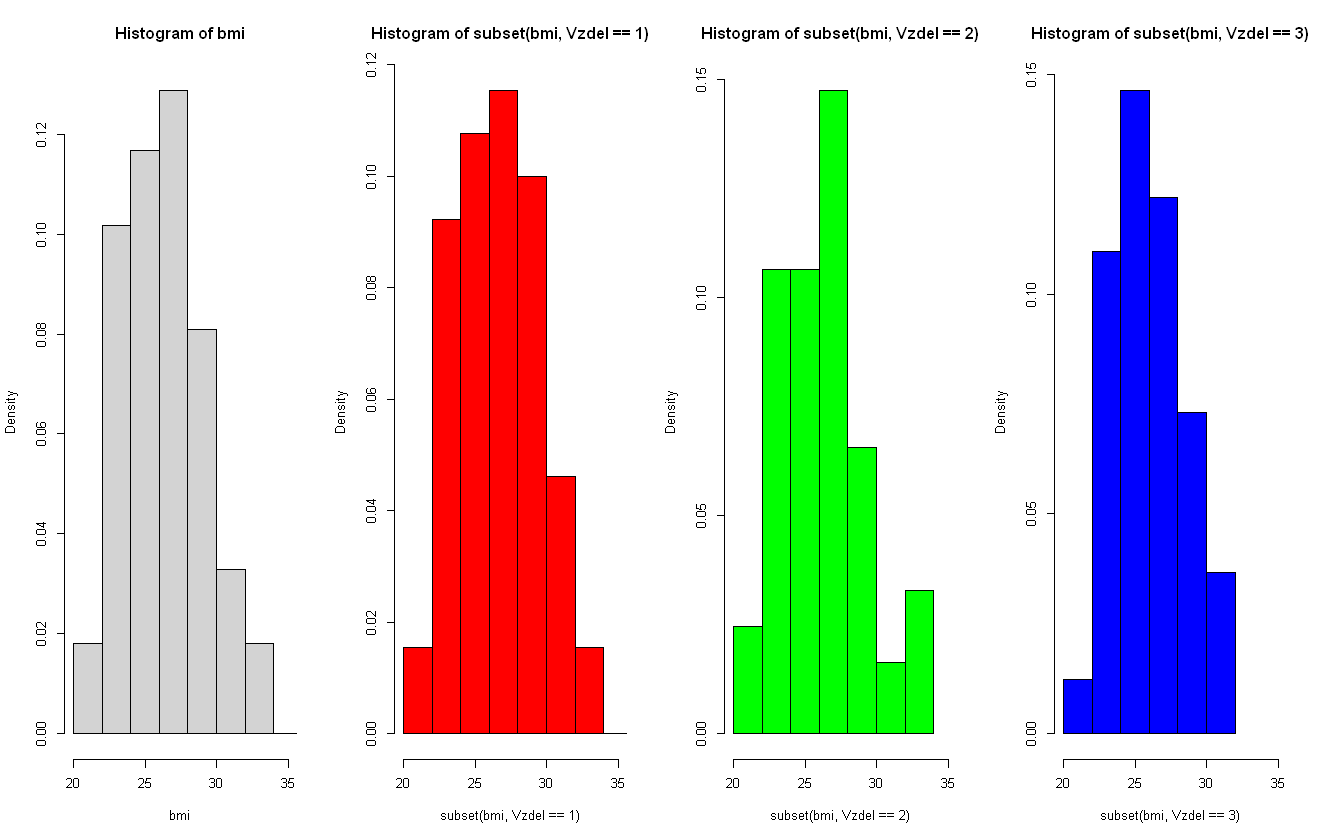

In [5]:
par(mfrow=c(1,4))
hist(bmi,prob=T,xlim=c(20,35))
hist(subset(bmi,Vzdel==1),prob=T,col="red",xlim=c(20,35))
hist(subset(bmi,Vzdel==2),prob=T,col="green",xlim=c(20,35))
hist(subset(bmi,Vzdel==3),prob=T,col="blue",xlim=c(20,35))

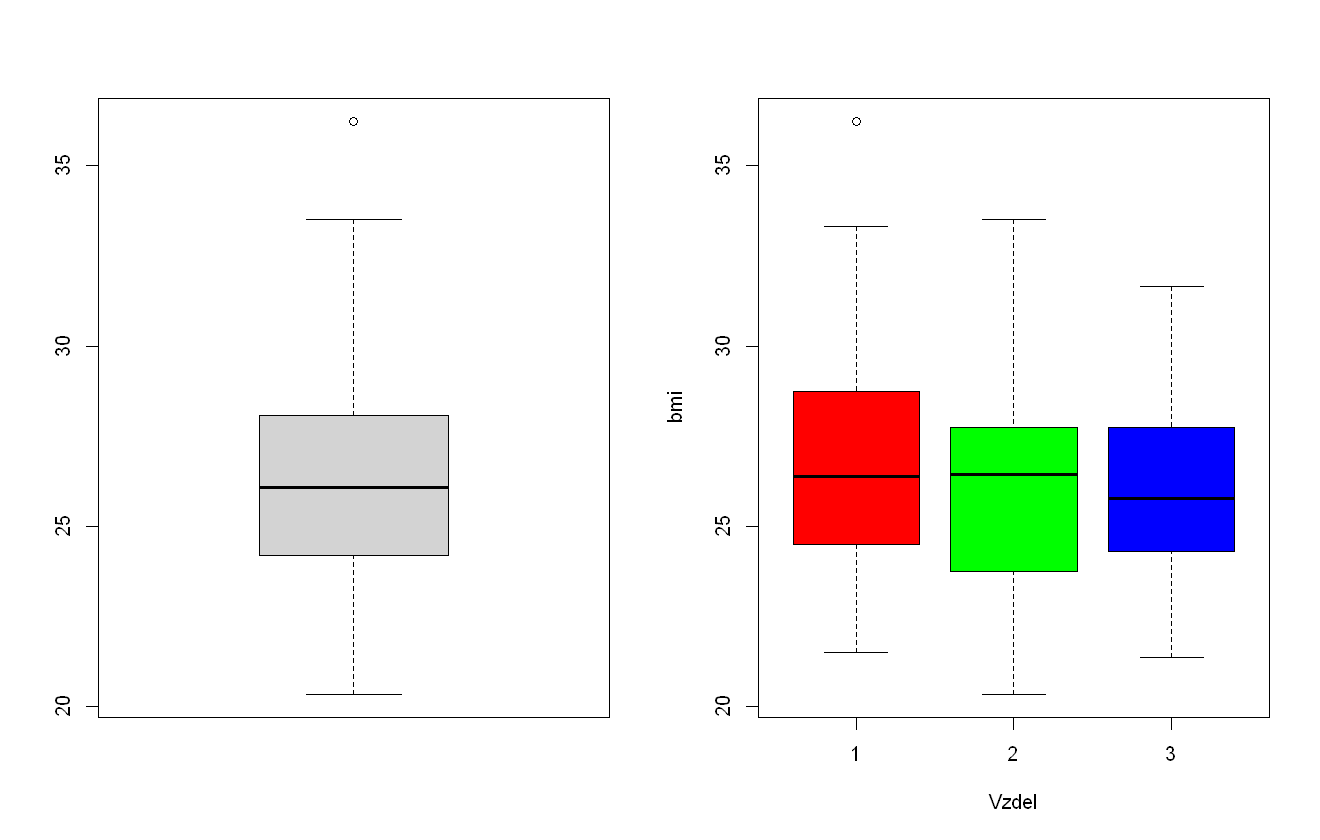

In [6]:
par(mfrow=c(1,2))
boxplot(bmi)
boxplot(bmi~Vzdel,col=c("red","green","blue"))

**Model:**

Závislou proměnnou bmi označíme jako $Y_{ij}$, kde $i=1,2,3$ značí jednotlivé úrovně vzdělání. Uvažujeme model závislosti
$$\begin{aligned}
Y_{1i}&=\mu+\epsilon_{1i},\\
Y_{2i}&=\mu+\alpha_2+\epsilon_{2i},\\
Y_{3i}&=\mu+\alpha_3+\epsilon_{3i},
\end{aligned}$$
kde $\epsilon_{ij}$ jsou i.i.d. $\operatorname N(0,\sigma^2).$
Chceme testovat, zda jsou všechny střední hodnoty stejné, nebo zda se významně liší. Tedy testujeme $H_0:\alpha_2=\alpha_3=0$ v.s. $H_A:\alpha_2\neq 0\text{ nebo }\alpha_3\neq 0.$

Odhadneme parametry:

In [7]:
fitVz=lm(bmi~Vzdel)
fitVz


Call:
lm(formula = bmi ~ Vzdel)

Coefficients:
(Intercept)       Vzdel2       Vzdel3  
    26.6651      -0.4682      -0.7354  


**Testy předpokladů**

Aby fungovaly metody analýzy rozptylu, musíme ověřit:
- Normalitu odchylek.
- Shodu rozptylů odchylek napříč kategoriemi

Odchylky odhadneme pomocí reziduí $r_i=Y_{ij}-\hat Y_{ij}$:

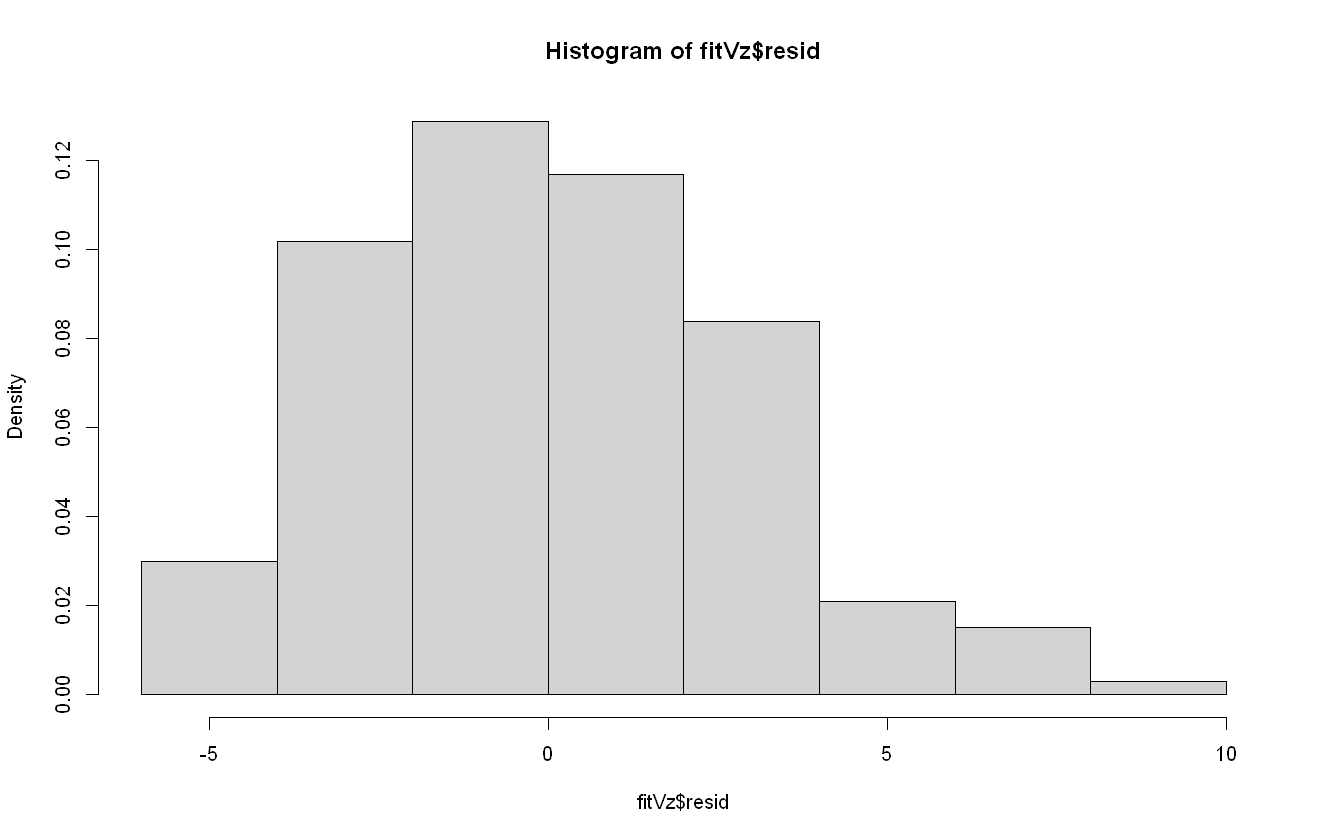

In [8]:
hist(fitVz$resid,prob=T)

Normalitu ověříme např. Shapiro-Wilkovým testem. p-hodnota je 0.0789, normalitu těsně nezamítáme.

In [9]:
shapiro.test(fitVz$resid)


	Shapiro-Wilk normality test

data:  fitVz$resid
W = 0.98544, p-value = 0.07897


Shodu rozptylů můžeme ověřit Bartlettovým nebo Leveneovým testem. F-test nám nestačí, protože máme tři skupiny. Ani jeden z testů shodu rozptylů nezamítne.

In [10]:
by(fitVz$resid,Vzdel,var)

Vzdel: 1
[1] 9.535096
------------------------------------------------------------------------------------------------------------------------ 
Vzdel: 2
[1] 9.100321
------------------------------------------------------------------------------------------------------------------------ 
Vzdel: 3
[1] 5.52912

In [11]:
bartlett.test(bmi~Vzdel)


	Bartlett test of homogeneity of variances

data:  bmi by Vzdel
Bartlett's K-squared = 3.7593, df = 2, p-value = 0.1526


In [12]:
leveneTest(bmi~Vzdel)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,1.507249,0.2245709
,164,NA,NA


**Testování**

Test hypotézy středních hodnot provedeme nejprve pomocí F-testu analýzy rozptylu. Funkce `aov` nafituje model a spočítá:
$$\begin{aligned}
S_e&=\sum_i\sum_j(Y_{ij}-\bar Y_{i\bullet})^2\qquad\text{reziduální součet čtverců},\\
S_T&=\sum_i\sum_j(Y_{ij}-\bar Y_{\bullet\bullet})^2\qquad\text{celkový součet čtverců},\\
S_A&=\sum_i n_i (\bar Y_{i\bullet}-\bar Y_{\bullet\bullet})^2\qquad\text{jejich rozdíl, tedy část variability vysvětlenou modelem}.
\end{aligned}$$

In [13]:
aov(bmi~Vzdel)

Call:
   aov(formula = bmi ~ Vzdel)

Terms:
                    Vzdel Residuals
Sum of Squares    14.9034 1377.4302
Deg. of Freedom         2       164

Residual standard error: 2.898097
Estimated effects may be unbalanced

- Reziduální součet čtverců (část variability nevysvětlená modelem) je 1377.43
- Součet čtverců vysvětlený různými průměry ve skupinách je 14.90 

Za platnosti nulové hypotézy platí, že $$F=\frac{S_A/(I-1)}{S_e/(n-I)}$$ má Fisherovo-Snedecorovo F-rozdělení s $I-1$ a $n-I$ stupni volnosti. p-hodnota testu pak udává pravděpodobnost, že F-rozdělení bude vyšší než spočítaná F-statistika. Test zavoláme příkazem `anova` na model nafitovaný pomocí `aov` nebo `lm`:

In [14]:
anova(aov(bmi~Vzdel))
## anova(fitVz)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Vzdel,2,14.90335,7.451675,0.8872135,0.4137687
Residuals,164,1377.43025,8.398965,NA,NA


p-hodnota je 0.4317, takže na hladině významnosti $\alpha=5 \%$ *nezamítáme* nulovou hypotézu shody středních hodnot bmi jednotlivých kategorií.

---

<font color="blue">**Nyní je čas udělat úkoly 1.a-e) v druhém notebooku**</font>

---

## Odhady středních hodnot.

Víme, že střední hodnota pro Vzdel=1 je $\mu$, pro Vzdel=2 $\mu+\alpha_2$ a pro Vzdel=3 $\mu+\alpha_3$. Odhady parametrů nám dala funkce `lm`. Podíváme se na jejich vlastnosti:

In [15]:
summary(fitVz)


Call:
lm(formula = bmi ~ Vzdel)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8586 -2.1279 -0.1533  1.8296  9.5624 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.6651     0.3595  74.180   <2e-16 ***
Vzdel2       -0.4682     0.5166  -0.906    0.366    
Vzdel3       -0.7354     0.5780  -1.272    0.205    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.898 on 164 degrees of freedom
Multiple R-squared:  0.0107,	Adjusted R-squared:  -0.001361 
F-statistic: 0.8872 on 2 and 164 DF,  p-value: 0.4138


Získáme odhady $26.6651$, $26.6651-0.4682=26.1969$ a $26.6651-0.7354=25.9297$. Můžeme ověřit, že to jsou průměry pozorování v jednotlivých kategoriích.

p-hodnoty t-testů nulovosti $\alpha_2$ a $\alpha_3$ jsou vysoké, což odpovídá nevýznamnému rozdílu ve středních hodnotách.

Porovnání středních hodnot po dvojicích můžeme udělat pomocí Tukeyho HSD testu. Ten vyžaduje jako vstup nafitovaný model `aov`:

In [16]:
TukeyHSD(aov(bmi~Vzdel))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = bmi ~ Vzdel)

$Vzdel
          diff       lwr       upr     p adj
2-1 -0.4681633 -1.690081 0.7537548 0.6371693
3-1 -0.7353898 -2.102435 0.6316551 0.4128289
3-2 -0.2672265 -1.651499 1.1170462 0.8915400


Získali jsme rozdíly mezi průměry v jednotlivých kategoriích, konfidenční intervaly pro rozdíl a p-hodnoty testu nulovosti rozdílů. Opět vidíme, že rozdíly nejsou významné.

**Reparametrizace**

Jednotlivé hodnoty faktorových proměnných jsou v modelové matici $\mathbf X$ reprezentovány pomocí nula-jedničkových proměnných, tzv. kontrastů. Matici můžeme získat příkazem `model.matrix`:

In [17]:
model.matrix(fitVz)

,(Intercept),Vzdel2,Vzdel3
1,1,0,0
2,1,0,0
3,1,0,1
4,1,0,0
5,1,1,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,1,0
10,1,0,1


Matice odpovídá defaultní situaci, kdy první úroveň faktoru je základní a všechny další s ní porovnáváme. Práci s kontrasty můžeme řídit pomocí parametru `contr`. Návod, jak dát dohromady jednotlivé průměry, dostaneme jako atribut modelové matice:

In [18]:
fit1=lm(bmi~Vzdel,contr=list(Vzdel = contr.treatment))
attributes(model.matrix(fit1))$contrasts

,2,3
1,0,0
2,1,0
3,0,1


Pokud chceme průměr první kategorie, k interceptu nepřičítáme nic. Pokud chceme průměr druhé, přičteme druhý koeficient. Pro průměr třetí přičteme třetí koeficient.

Defaultní kontrasty softwaru SAS například používají jako baseline poslední proměnnou. Pro některé účely se může hodit mít baseline uprostřed a k ní koeficienty přičítat nebo odečítat - k tomu se hodí kontrasty typu sum nebo helmert. Vyzkoušejte sami. 

In [19]:
fit1=lm(bmi~Vzdel,contr=list(Vzdel = contr.treatment))
fit2=lm(bmi~Vzdel,contr=list(Vzdel = contr.SAS))
fit3=lm(bmi~Vzdel,contr=list(Vzdel = contr.sum))
fit4=lm(bmi~Vzdel,contr=list(Vzdel = contr.helmert))

attributes(model.matrix(fit1))$contrasts
attributes(model.matrix(fit2))$contrasts
attributes(model.matrix(fit3))$contrasts
attributes(model.matrix(fit4))$contrasts

,2,3
1,0,0
2,1,0
3,0,1


,1,2
1,1,0
2,0,1
3,0,0


1,1,0
2,0,1
3,-1,-1


1,-1,-1
2,1,-1
3,0,2


---

<font color="blue">**Nyní je čas udělat úkoly 2.a-d) v druhém notebooku**</font>

---

## Analýza rozptylu dvojného třídění

Kromě vlivu vzdělání na body mass index chceme zkoumat i zda má vliv, jestli je sledovaný pacient kuřák nebo ne.

Nejprve si udělejme představu na základě popisných statistik

Kurak: FALSE
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  21.37   24.89   26.85   26.99   28.65   33.51 
------------------------------------------------------------------------------------------------------------------------ 
Kurak: TRUE
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.34   23.80   25.88   25.95   27.73   36.23 

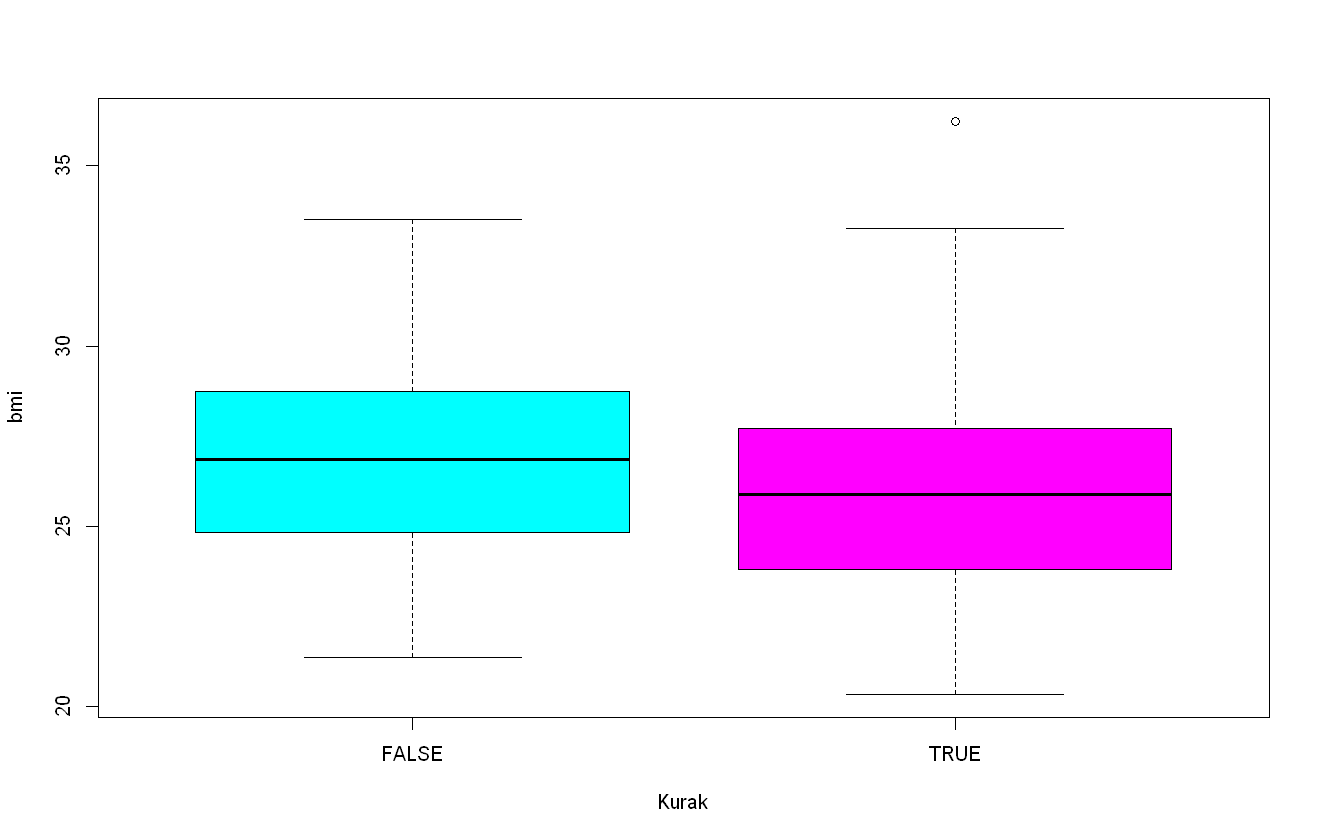

In [20]:
by(bmi,Kurak,summary)
boxplot(bmi~Kurak,col=c("cyan","magenta"))

Vidíme, že kuřáci mají o trochu nižší průměrný body mass index

Vyzkoušejme model analýzy rozptylu dvojného třídění
$$Y_{ijk}=\mu+\alpha_i+\beta_j+\epsilon_{ijk},$$
kde $\alpha_i$ jsou posunutí ve střední hodnotě pro jednotlivé úrovně vzdělání a $\beta_j$ posunutí pro kuřáky.

Můžeme opět spočítat celkový součet čtverců, reziduální součet čtverců a součty čtverců odpovídající jednotlivým proměnným.

In [21]:
aov(bmi~Kurak)

Call:
   aov(formula = bmi ~ Kurak)

Terms:
                    Kurak Residuals
Sum of Squares    41.0063 1351.3273
Deg. of Freedom         1       165

Residual standard error: 2.861794
Estimated effects may be unbalanced

In [22]:
aov(bmi~Vzdel+Kurak)

Call:
   aov(formula = bmi ~ Vzdel + Kurak)

Terms:
                    Vzdel     Kurak Residuals
Sum of Squares    14.9034   61.8176 1315.6127
Deg. of Freedom         2         1       163

Residual standard error: 2.840993
Estimated effects may be unbalanced

In [23]:
anova(aov(bmi~Vzdel+Kurak))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Vzdel,2,14.90335,7.451675,0.9232375,0.399297927
Kurak,1,61.81756,61.817555,7.6589878,0.006302691
Residuals,163,1315.61269,8.071244,NA,NA


Pozor, výstupní tabulka udává rozklad typu I, kdy:
- První řádek udává, o kolik se zmenší součet čtverců zahrnutím závislosti na vzdělání
- Druhý řádek udává, o kolik se zmenší součet čtverců navíc s přidanou závislostí na kouření.

- Druhý řádek tedy testuje hypotézu $\beta_j=0$ v modelu $Y_i=\mu+\alpha_i+\beta_j$, první řádek testuje $\alpha_i=0$ v modelu $Y_i=\mu+\alpha_i$
- Prohozením pořadí proměnných se změní interpretace výsledků. 

In [24]:
anova(aov(bmi~Kurak+Vzdel))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Kurak,1,41.00632,41.006324,5.080546,0.02552823
Vzdel,2,35.71458,17.857291,2.212458,0.11270736
Residuals,163,1315.61269,8.071244,NA,NA


Hodnoty odhadů regresních koeficientů získáme fitováním `lm`:

In [25]:
fitVzK=lm(bmi~Vzdel+Kurak)
summary(fitVzK)


Call:
lm(formula = bmi ~ Vzdel + Kurak)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4524 -1.9902 -0.1659  1.8380  9.8299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.7350     0.5231  53.021   <2e-16 ***
Vzdel2       -0.6830     0.5124  -1.333   0.1844    
Vzdel3       -1.2181     0.5928  -2.055   0.0415 *  
KurakTRUE    -1.3374     0.4832  -2.767   0.0063 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.841 on 163 degrees of freedom
Multiple R-squared:  0.0551,	Adjusted R-squared:  0.03771 
F-statistic: 3.168 on 3 and 163 DF,  p-value: 0.02595


Použili jsme defaultní parametrizaci kontrastů. Odhadli jsme:
- Pro základní kombinaci faktorů (vzdělání=1, nekuřák) je průměrný bmi roven 27.7350
- Pro středoškoláky v průměru klesá o 0.6830
- Pro vysokoškoláky v průměru klesá o 1.2181
- Pro kuřáky v průměru klesá o 1.3374

Modelová matice $\mathbf X$ je složitější:

In [26]:
fitVzK=lm(bmi~Vzdel+Kurak,contr=list(Vzdel = contr.treatment,Kurak=contr.treatment))
model.matrix(fitVzK)

,(Intercept),Vzdel2,Vzdel3,Kurak2
1,1,0,0,0
2,1,0,0,1
3,1,0,1,0
4,1,0,0,1
5,1,1,0,1
6,1,0,0,1
7,1,0,0,1
8,1,0,0,0
9,1,1,0,0
10,1,0,1,0


In [27]:
attributes(model.matrix(fitVzK))$contrasts

$Vzdel
  2 3
1 0 0
2 1 0
3 0 1

$Kurak
      2
FALSE 0
TRUE  1

## Dvojné třídění s interakcemi

Uvažujme model $$Y_{ijk}=\mu+\alpha_i+\beta_j+\gamma_{ij}+\epsilon_{ijk}.$$

V každé kombinaci kategorií může být střední hodnota posunuta jinak. 

In [28]:
aov(bmi~Vzdel*Kurak)

Call:
   aov(formula = bmi ~ Vzdel * Kurak)

Terms:
                    Vzdel     Kurak Vzdel:Kurak Residuals
Sum of Squares    14.9034   61.8176     12.1705 1303.4422
Deg. of Freedom         2         1           2       161

Residual standard error: 2.845332
Estimated effects may be unbalanced

In [29]:
anova(aov(bmi~Vzdel*Kurak))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Vzdel,2,14.90335,7.451675,0.9204242,0.400435758
Kurak,1,61.81756,61.817555,7.6356484,0.006389387
Vzdel:Kurak,2,12.17049,6.085245,0.7516439,0.473238155
Residuals,161,1303.44220,8.095914,NA,NA


p-hodnota testu nulovosti interakcí je 0.473238155, takže je můžeme považovat za nevýznamné.

Odhady regresních koeficientů opět získáme pomocí `lm`:

In [30]:
fitVzKint=lm(bmi~Vzdel*Kurak)
summary(fitVzKint)


Call:
lm(formula = bmi ~ Vzdel * Kurak)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4694 -1.9660 -0.1745  1.9363  9.8342 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       27.7520     0.7892  35.167   <2e-16 ***
Vzdel2            -0.3216     0.9954  -0.323    0.747    
Vzdel3            -1.6068     0.9873  -1.627    0.106    
KurakTRUE         -1.3586     0.8823  -1.540    0.126    
Vzdel2:KurakTRUE  -0.5707     1.1636  -0.490    0.624    
Vzdel3:KurakTRUE   0.8678     1.2571   0.690    0.491    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.845 on 161 degrees of freedom
Multiple R-squared:  0.06384,	Adjusted R-squared:  0.03477 
F-statistic: 2.196 on 5 and 161 DF,  p-value: 0.05723


Podle t-test nulovosti regresních koeficientů by kromě absolutního členu nic nevyšlo významné. Pozor, to neznamená, že můžeme všechny členy vynechat (rozmyslete).  

Modelovací matice obsahuje další sloupce:

In [31]:
model.matrix(fitVzKint)

,(Intercept),Vzdel2,Vzdel3,KurakTRUE,Vzdel2:KurakTRUE,Vzdel3:KurakTRUE
1,1,0,0,0,0,0
2,1,0,0,1,0,0
3,1,0,1,0,0,0
4,1,0,0,1,0,0
5,1,1,0,1,1,0
6,1,0,0,1,0,0
7,1,0,0,1,0,0
8,1,0,0,0,0,0
9,1,1,0,0,0,0
10,1,0,1,0,0,0


In [32]:
## nakonec zapomeneme data IchsN
detach(IchsN)

---

<font color="blue">**Nyní je čas udělat úkoly 3.a-c) v druhém notebooku**</font>

---